<a href="https://colab.research.google.com/github/mrunalini1806/python/blob/main/Zomato_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# reviewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Cleaning data: converting the rate column to float

In [8]:
def handleRate(value):
        value = str(value).split('/')
        value =(value)[0];
        return float(value)
df['rate'] = df['rate'].apply(handleRate)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


Display no of Restaurants in each category.

In [9]:
display(df['listed_in(type)'].value_counts())

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


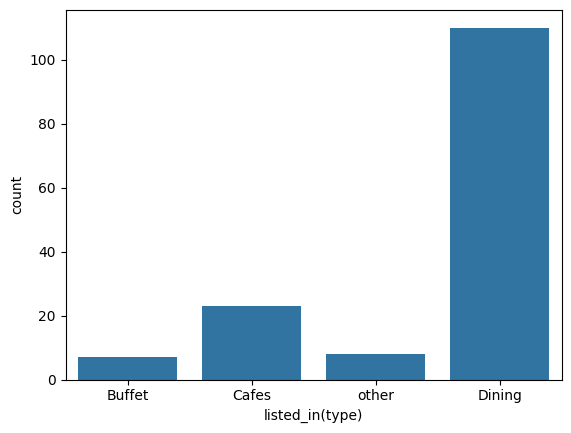

In [19]:
sns.countplot(x = df['listed_in(type)'])
axes: plt.xlabel = 'Type of Restaurant'
plt.ylabel = 'Count'
plt.show()


Majority of Restaurants fall under dining category.

Counting the votes for each category.

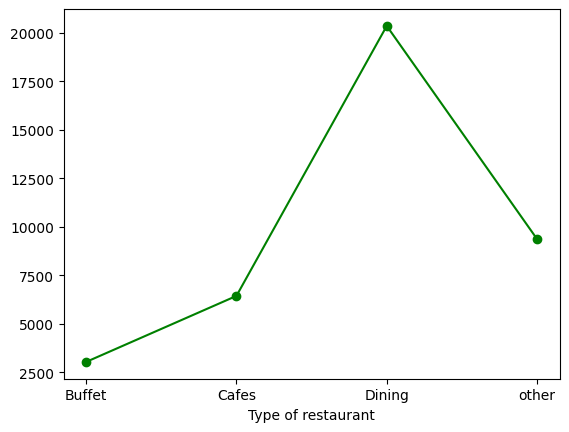

In [28]:
grouped_data= df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.show()

Majority of the customers like to dine in.

Find the restaurant with highest number of votes.

In [34]:
df.query('votes == votes.max()')
print('Restaurant with maximum number of votes is : ',df.query('votes == votes.max()')['name'].values)

Restaurant with maximum number of votes is :  ['Empire Restaurant']


Exploring the online_order column to check how many restaurants accept online orders.

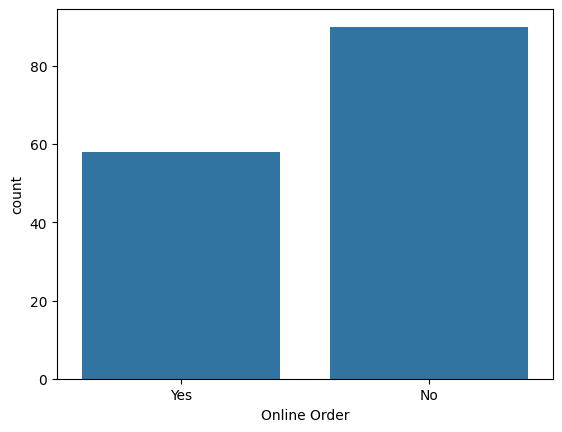

In [35]:
sns.countplot(x = df['online_order'])
plt.xlabel('Online Order')
plt.show()

The above plot shows that majority of Restaurants do not accept online orders.

Analyze the distribution of ratings from the rate column.

In [39]:
avg_rating = df['rate'].mean()
print('Average rating of restaurants is : ',avg_rating)

Average rating of restaurants is :  3.6331081081081082


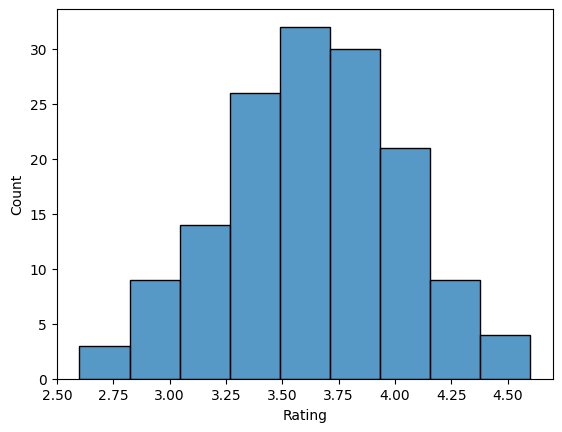

In [38]:
sns.histplot(df['rate'])
plt.xlabel('Rating')
plt.show()

In [46]:
print('Restaurant with maximum rating is : ')
display(df.query('rate == rate.max()'))


Restaurant with maximum rating is : 


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
44,Onesta,Yes,Yes,4.6,2556,600,other


Find approximate cost for couples.

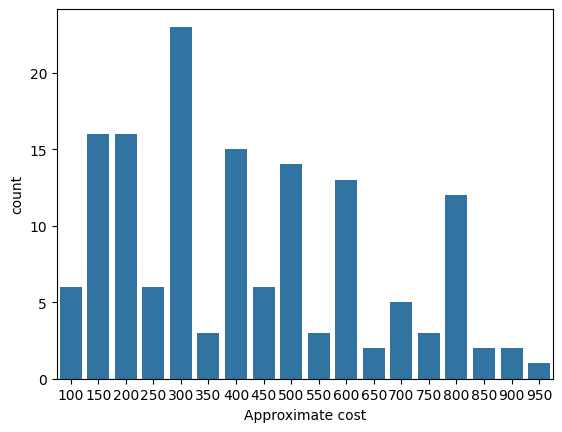

In [54]:
approx_cost = df['approx_cost(for two people)']

sns.countplot(x=approx_cost)
plt.xlabel('Approximate cost')
plt.show()

The above plot shows majority of customers prefer restaurants with an approximate cost of 300.

Comparing ratings of Online v/s Offline orders

In [55]:
display(df.groupby('online_order')['rate'].mean())

,rate
online_order,
No,3.487778
Yes,3.858621


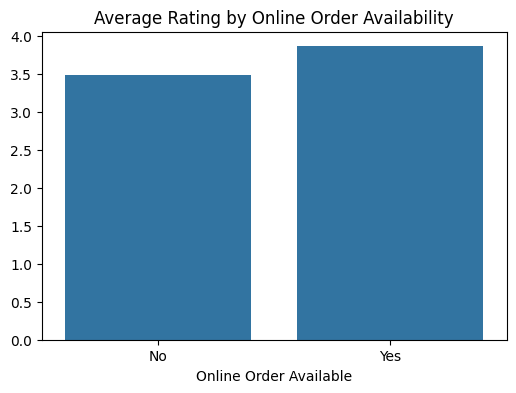

In [63]:
online_order_ratings = df.groupby('online_order')['rate'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=online_order_ratings.index, y=online_order_ratings.values)
plt.xlabel('Online Order Available')
plt.ylabel('Average Rating')
plt.title('Average Rating by Online Order Availability')
plt.show()

Conclusion: Restaurants where online orders are available have better ratings than offline orders.

Find the relationship between order mode and restaurant type.

# Task
Analyze the relationship between order mode and restaurant type using a pivot table and heatmap.

## Create a pivot table

### Subtask:
Create a pivot table to count the occurrences of each restaurant type for each online order mode.


**Reasoning**:
Create a pivot table to show the relationship between online order availability and restaurant type by counting the number of restaurants in each category.



In [65]:
order_type_pivot = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
display(order_type_pivot)

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


## Generate a heatmap

### Subtask:
Use the pivot table to generate a heatmap to visualize the relationship between order mode and restaurant type.


**Reasoning**:
Generate a heatmap using the pivot table to visualize the relationship between order mode and restaurant type, including annotations and a title.



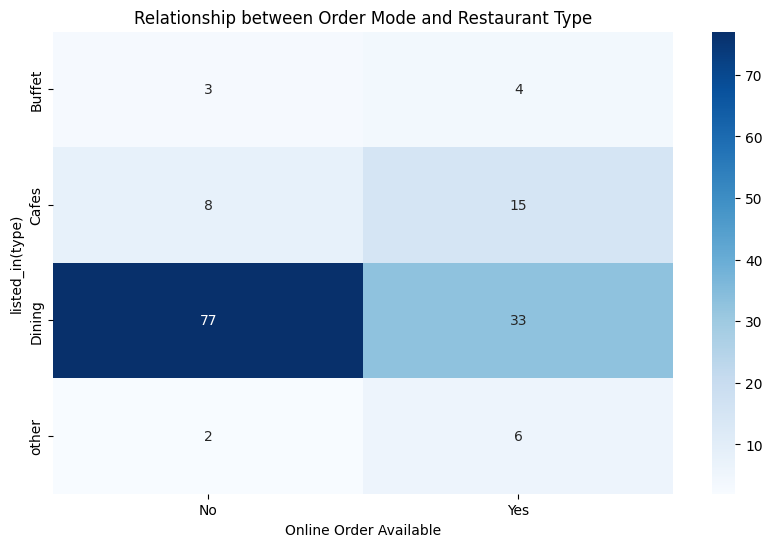

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(order_type_pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Order Mode and Restaurant Type')
plt.xlabel('Online Order Available')
plt.show()

With the heat map it can be found that Dining restaurants accept more offline orders whereas Cafes accept online orders.